In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
#import tensorflow as tf
#from tensorflow import keras
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#df2 = df.loc[((df['a'] > 1) & (df['b'] > 0)) | ((df['a'] < 1) & (df['c'] == 100))]
#print(df2)
#OUTPUT
 #  a   b    c
#0  2  20  300
#1  2  20    0
#4  3  10  100

#filterinfDataframe = dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]


# Analyzing Data

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
#Let's check the feature typs
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Here we are seeing that 3 features are Numerical and rest all of are strings type.But here one noticable point is 
'TotalCharges' feature is given as object type, which cann,t be object and we have to convert it into numeric type. 


In [7]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [9]:
#Here we are seeing that some of the valus contain space(' ') let's tackle it.
pd.to_numeric(df.TotalCharges, errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

it will convert all the values into numeric and ignore or put nan where it founnd '  '.

In [10]:
#Let's have a glance of those rows whichccontains space (' ').
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


 Here we are seeing that out of 7043, 11 rows contains ' '.So we can drop those rows .

In [11]:
new_df = df[df.TotalCharges != ' ']

In [12]:
new_df.shape

(7032, 21)

In [13]:
#So now safely convert the feature type.
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges)

C:\Users\Sudhakor Das\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
new_df.TotalCharges.dtypes

dtype('float64')

# EDA

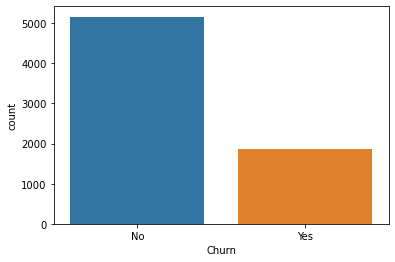

In [15]:
sns.countplot(x = 'Churn', data = new_df)

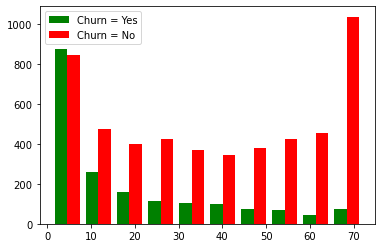

In [16]:
#Let'us see the realationship between numercal features and the target features.
tenure_churn_yes = new_df[new_df.Churn=='Yes'].tenure
tenure_churn_no = new_df[new_df.Churn=='No'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label = ['Churn = Yes', 'Churn = No'] )
plt.legend()

From the above chart we are seeing that man who are associated with the company greater than 60 months are likly to not churning.
And who are less then 10 months are likely to churn the company.

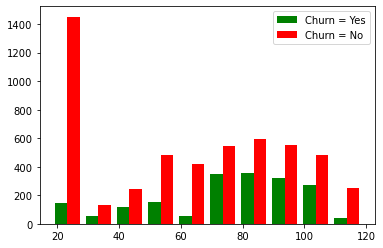

In [17]:
mc_churn_yes = new_df[new_df.Churn=='Yes'].MonthlyCharges
mc_churn_no = new_df[new_df.Churn=='No'].MonthlyCharges

plt.hist([mc_churn_yes, mc_churn_no], color = ['green', 'red'], label = ['Churn = Yes', 'Churn = No'] )
plt.legend()

Here we are seeing that more 1400 people are not likely to churn the company as they have monthlychargers less then 30

# Data  Cleaning

Outliers Checking:

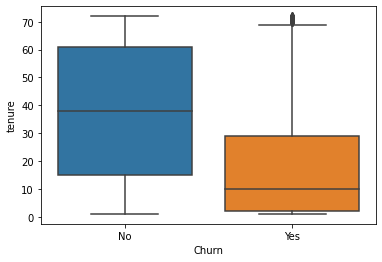

In [18]:
#Out_check = ( 'tenure', 'MonthlyCharges','TotalCharges')
sns.boxplot(x = 'Churn', y = 'tenure', data = new_df)

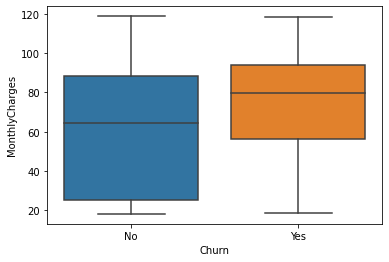

In [19]:
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data = new_df)

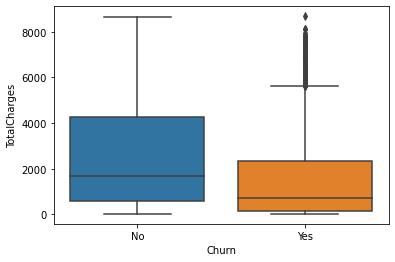

In [20]:
sns.boxplot(x = 'Churn', y = 'TotalCharges', data = new_df)

Here we are seeing there is decent amount of outliers in 'TotalCharges' features.And i think it willnot
be wise delete or substitue those value because this feature obtained from multiplyinf 'MonthlyCharges' by 'tenure'
and which is not imaginary but true values.

In [21]:
# I dont't think customerID columns will be eventfull in our way so drop it
new_df.drop('customerID', axis = 1, inplace = True)

C:\Users\Sudhakor Das\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
 for column in new_df:
        print(column)
        

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [23]:
def uni_col_val(df):
    for column in df:
        if df[column].dtype == 'object':
            print(f'{column} : {df[column].unique()}')

In [24]:
 uni_col_val(new_df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


# Let's find some insights:

Here we are seeing that a lot's of column contain yes and no value.And 'No phone service and 'No internet service' is equavalent to no.So first convert those values into no. 

In [25]:
new_df.replace( 'No phone service', 'No', inplace = True )
new_df.replace( 'No internet service', 'No', inplace = True )

C:\Users\Sudhakor Das\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [26]:
 uni_col_val(new_df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Here we are seeing some categorical features we will handlee this but before that let's map the rest all the features.

In [27]:

                
new_df['Partner'].replace({'Yes' : 1, 'No' : 0},inplace = True)
new_df['Dependents'].replace({'Yes' : 1, 'No' : 0},inplace = True)
new_df['PhoneService'].replace({'Yes' : 1, 'No' : 0},inplace = True)
new_df['MultipleLines'].replace({'Yes' : 1, 'No' : 0},inplace = True)
new_df['OnlineSecurity'].replace({'Yes' : 1, 'No' : 0},inplace = True)
new_df['OnlineBackup'].replace({'Yes' : 1, 'No' : 0},inplace = True)
new_df['DeviceProtection'].replace({'Yes' : 1, 'No' : 0},inplace = True)
new_df['TechSupport'].replace({'Yes' : 1, 'No' : 0},inplace = True)
new_df['StreamingTV'].replace({'Yes' : 1, 'No' : 0},inplace = True)
new_df['StreamingMovies'].replace({'Yes' : 1, 'No' : 0},inplace = True)
new_df['Churn'].replace({'Yes' : 1, 'No' : 0},inplace = True)  
new_df['PaperlessBilling'].replace({'Yes' : 1, 'No' : 0},inplace = True)
           

C:\Users\Sudhakor Das\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [28]:
for col in new_df:
    print(f'{col} : {new_df[col].unique()}')
    

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [29]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [30]:
new_df['gender'].replace({'Female':1, 'Male':0},inplace = True)

C:\Users\Sudhakor Das\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [31]:
#Let's do label_encoding for the rest two categorical_features
le_IS = LabelEncoder()
le_CT = LabelEncoder()
le_PM = LabelEncoder()

In [32]:
new_df['InternetService'] = le_IS.fit_transform(new_df['InternetService'])
new_df['Contract'] = le_CT.fit_transform(new_df['Contract'])
new_df['PaymentMethod'] =le_PM.fit_transform(new_df['PaymentMethod'])


<ipython-input-32-fc61643753c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['InternetService'] = le_IS.fit_transform(new_df['InternetService'])
<ipython-input-32-fc61643753c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Contract'] = le_CT.fit_transform(new_df['Contract'])
<ipython-input-32-fc61643753c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Now our data is totally cleaned up and try to find some insights:

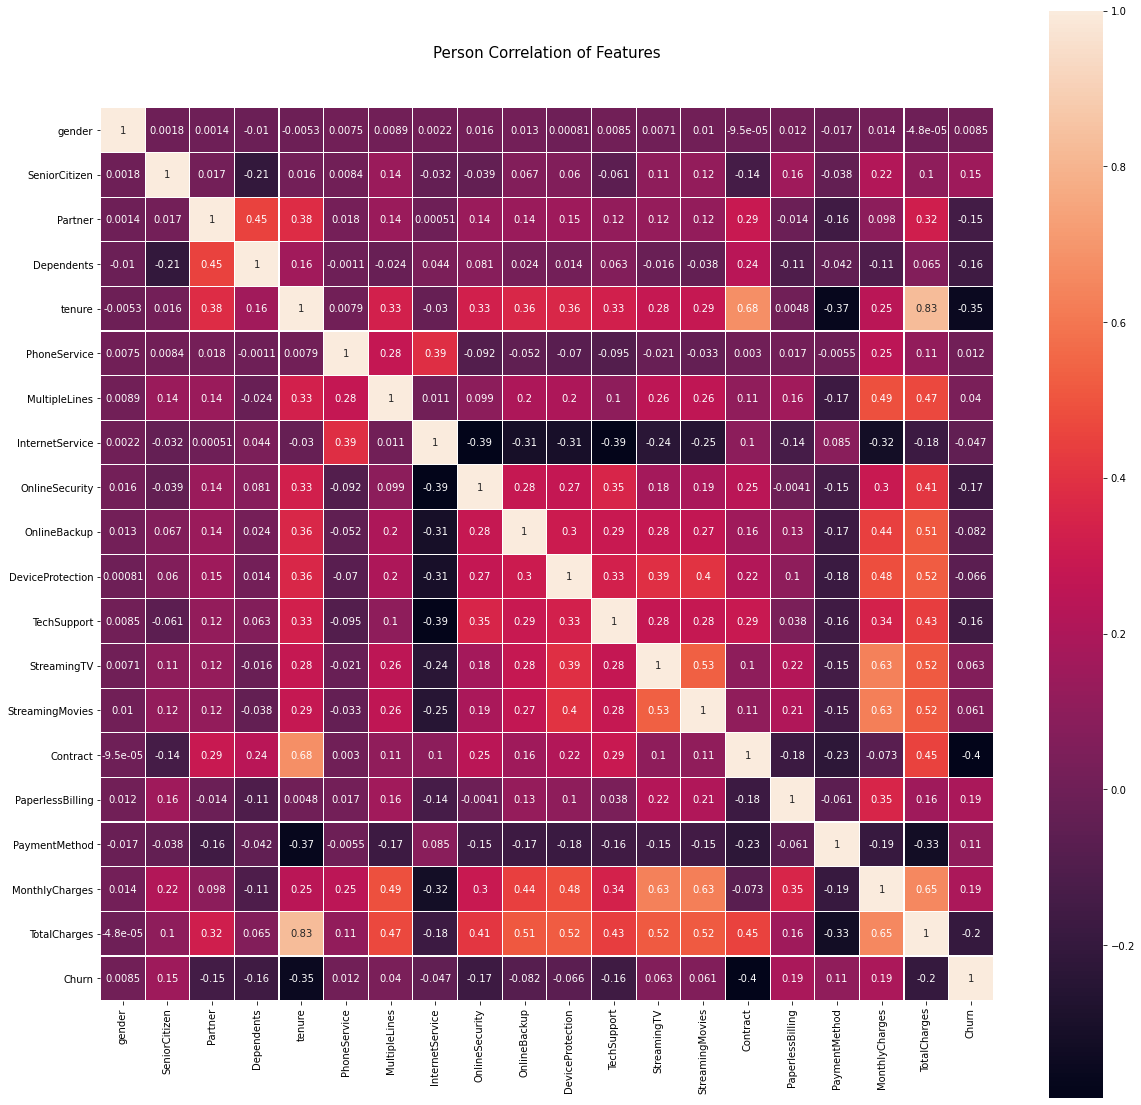

In [33]:
# first have the corelation
#colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Person Correlation of Features', y=1.05, size=15)
sns.heatmap(new_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)

Here we are not seeing a conclusive relationship among the features except Monthly and Total charges.Though i will try to get the best out of it. 

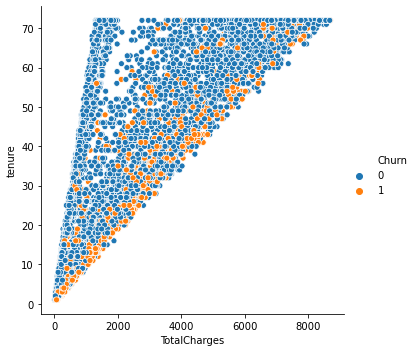

In [34]:
sns.relplot(x= 'TotalCharges', y = 'tenure' , hue = 'Churn', data = new_df)

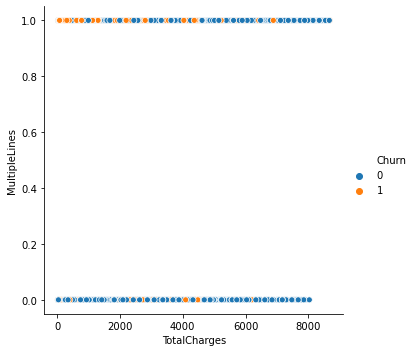

In [35]:
sns.relplot(x= 'TotalCharges', y = 'MultipleLines' , hue = 'Churn', data = new_df)

Except few people around 4000 rest of the are having Multiple line = 0 are not interested in Churn.
And people having multiple line and totalcharges greater then 6000 are also not interested in Churn.

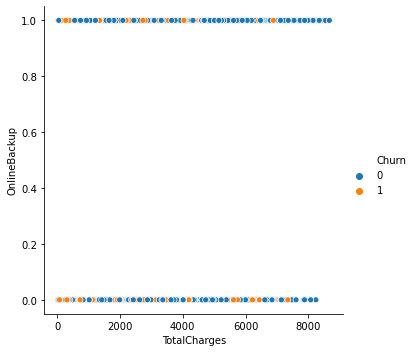

In [36]:
sns.relplot(x= 'TotalCharges', y = 'OnlineBackup' , hue = 'Churn', data = new_df)

And people having OnlineBackup and totalcharges greater then 4000 are not interested in Churn.

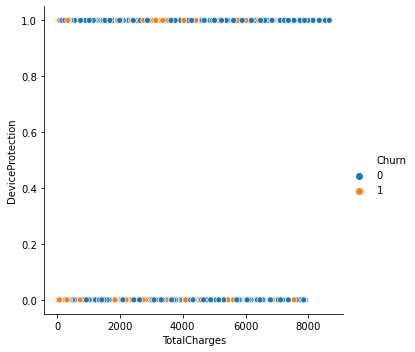

In [37]:
sns.relplot(x= 'TotalCharges', y = 'DeviceProtection' , hue = 'Churn', data = new_df)

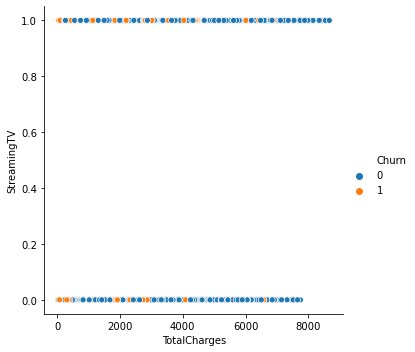

In [38]:
sns.relplot(x= 'TotalCharges', y = 'StreamingTV' , hue = 'Churn', data = new_df)

People who's charges greater then  4000 rest of the are having Streaming TV = 0 are totally  not interested in Churn.


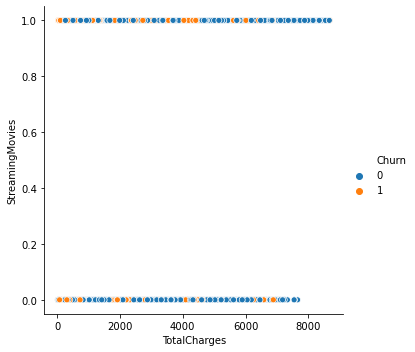

In [39]:
sns.relplot(x= 'TotalCharges', y = 'StreamingMovies' , hue = 'Churn', data = new_df)

In [ ]:
 sns.catplot(x= 'Dependents', y = 'Partner' , hue = 'Churn', data = new_df, kind = 'swarm')

In [30]:
#Let's scale down the data.

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
new_df[cols_to_scale] = scaler.fit_transform(new_df[cols_to_scale])

C:\Users\Sudhakor Das\.conda\envs\tf36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Sudhakor Das\.conda\envs\tf36\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [31]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0.000000,0,0,0,0,1,0,0,0,0,0,1,2,0.115423,0.001275,0
1,0,0,0,0,0.464789,1,0,0,1,0,1,0,0,0,1,0,3,0.385075,0.215867,0
2,0,0,0,0,0.014085,1,0,0,1,1,0,0,0,0,0,1,3,0.354229,0.010310,1
3,0,0,0,0,0.619718,0,0,0,1,0,1,1,0,0,1,0,0,0.239303,0.210241,0
4,1,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


In [32]:
X = new_df.drop(['Churn'], axis=1)
y = new_df.Churn

In [33]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
len(X_train.columns)

19

In [36]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (19,),activation = 'sigmoid'),
     keras.layers.Dense(16,activation = 'relu' ),
     keras.layers.Dense(12,activation = 'relu' ),
     keras.layers.Dense(1,activation = 'sigmoid' )
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
    
)

In [37]:
model.fit(X_train, y_train, epochs = 20)

Train on 5625 samples
Epoch 1/20
5625/5625 [==============================] - 3s 557us/sample - loss: 0.5508 - accuracy: 0.7342
Epoch 2/20
5625/5625 [==============================] - 0s 79us/sample - loss: 0.4598 - accuracy: 0.7682
Epoch 3/20
5625/5625 [==============================] - 0s 82us/sample - loss: 0.4376 - accuracy: 0.7842
Epoch 4/20
5625/5625 [==============================] - 0s 80us/sample - loss: 0.4338 - accuracy: 0.7872
Epoch 5/20
5625/5625 [==============================] - 0s 80us/sample - loss: 0.4310 - accuracy: 0.7865
Epoch 6/20
5625/5625 [==============================] - 0s 82us/sample - loss: 0.4288 - accuracy: 0.7961
Epoch 7/20
5625/5625 [==============================] - 0s 84us/sample - loss: 0.4272 - accuracy: 0.7911
Epoch 8/20
5625/5625 [==============================] - 0s 80us/sample - loss: 0.4259 - accuracy: 0.7941
Epoch 9/20
5625/5625 [==============================] - 0s 83us/sample - loss: 0.4252 - accuracy: 0.7927
Epoch 10/20
5625/5625 [=========

In [38]:
model.evaluate(X_test,y_test)

1407/1407 [==============================] - 0s 211us/sample - loss: 0.4365 - accuracy: 0.7903


[0.436546414412754, 0.79033405]

In [39]:
y_p = model.predict(X_test)

In [42]:
y_p[:10]

array([[0.0192298 ],
       [0.18238723],
       [0.7942225 ],
       [0.19019619],
       [0.2527593 ],
       [0.38676232],
       [0.21410677],
       [0.7904637 ],
       [0.29853803],
       [0.0389566 ]], dtype=float32)

In [43]:
y_pred = []
for output in y_p:
    if output>.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
    
    

In [44]:
y_pred[:10]

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]

In [45]:
y_test[:10]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int64

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

In [54]:
 print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



<AxesSubplot:>

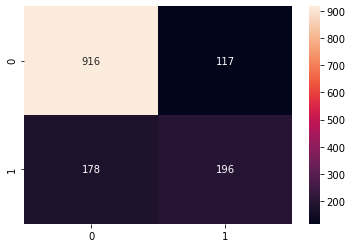

In [56]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
sns.heatmap(cm,annot = True,fmt = 'd')

Let's try to understand how confusion_matrix is formatted.

In [59]:
#Accuracy
round((916+196)/(916+117+178+196),2)

0.79

Precision for 0 class i.e Precision for customers who didn't chuened. 

In [64]:
round(916/(916+178),2)

0.84

Precision for 1 class i.e Precision for customers who actually  churned.

In [65]:
round(196/(196+117),2)

0.63

##### Recall for 0 class

In [66]:
round(916/(916+117), 2)

0.89

#### Recall for 1 class

In [63]:
round(196/(178+196), 2)

0.52